# <center>  Workshop - Intro to MDAnalysis</center>



# Workshop schedule

- **Section 1 :** Basics of MDAnalysis
  * Fundamental MDAnalysis objects
  * Atom selections
  * Visualising systems
  * Accessing bond, angle, and dihedral information

- **Section 2:** Positions, distances, and trajectory 
  * Accessing positions 
  * Calculating distances, bonds and angles
  * Accessing trajectory data

# Workshop schedule

- **Section 3:** Analysis tools
  * Built-in analyses 
  * Write your own analysis

- **Section 4:** Advanced Tips and Requests
  * Advanced universe creation
  * Creating and modifying attributes
  * ..Anything you'd like to see!
  

# Getting started with MDAnalysis

## Installing MDAnalysis

A conda environment containing all the dependencies you will need for this workshop is provided under `environment.yml`.

Installation instructions here: https://www.mdanalysis.org/pages/installation_quick_start/. Installation is normally done through **pip** or **conda**.

`pip install MDAnalysis`

If you want to use the example data used here, you'll also need MDAnalysisTests:

`pip install MDAnalysisTests`

MDAnalysis also has a repository of large example data files under MDAnalysisData:

`pip install MDAnalysisData`

# The general object structure of MDAnalysis

The two fundamental classes of MDAnalysis are the `Universe` and the `AtomGroup`.

<br><center><img src="imgs/mdaclasses.png" alt="mda" style="width: 2000px;"/></center>


- **The `Universe`** contains everything about a molecular dynamics system
  - Static information: atoms and their connectivities (topology)
  - Dynamic information: the trajectory (coordinates, frames)
  
<br><center><img src="imgs/mdaclasses.png" alt="mda" style="width: 2000px;"/></center>

- The atoms in a `Universe` can be accessed through a hierarchy of containers:
 - *Atoms* can be grouped together into **an `AtomGroup`** 
    - *Residues* are made up of *atoms*. They can be grouped into `ResidueGroups`
      - *Segments* are made up of *residues*. They can be grouped into `SegmentGroups`.
        
<br><center><img src="imgs/mdaclasses.png" alt="mda" style="width: 2000px;"/></center>

# A (very) basic workflow for an analysis in MDAnalysis:

1. import MDAnalysis
2. create a `Universe`
3. define an `AtomGroup`
4. collect position data
5. analyse!

# The `Universe`

## The basic command for loading a universe is:

 `u = mda.Universe(topology, trajectory)`

In [8]:
import warnings
warnings.filterwarnings("ignore") 

- The *topology* file must contain the atom information 
- The (optional) *trajectory* file(s) contains the positions of atoms with time.

Note that some files can double as both a *topology* and a *trajectory* (e.g. PDB files).

MDanalysis supports [over 40 input file types](https://userguide.mdanalysis.org/2.0.0-dev0/formats/index.html#formats)

In [9]:
# First we import MDAnalysis
import MDAnalysis as mda

# Let's get some example data
from MDAnalysis.tests.datafiles import PSF, DCD

# and now load our universe!
u = mda.Universe(PSF, DCD)
u

<Universe with 3341 atoms>

## Key properties of a `Universe`:

- `atoms`: an `AtomGroup` containing all of the system's atoms
    - similarly, `segments` and `residues`; a `SegmentGroup` and a `ResidueGroup`, respectively
    
- Various bond and angle information, as `TopologyGroups`: `bonds`, `angles`, `dihedrals`, `impropers` (if found in the topology file)

- `trajectory` (section 2): accessing time-dependent data structures

In [2]:
u.bonds

<TopologyGroup containing 3365 bonds>

# AtomGroups

## An `AtomGroup` is an "array" of atoms.

We can get various properties of each atom contained in an `AtomGroup` through attribues, e.g.:

   - `names`
   - `resnames`
   - `resids` 
   - `charges`
   - `masses`

Exactly which properties you can get depend on what is read from the topology (see the [documentation](https://userguide.mdanalysis.org/2.0.0-dev0/formats/index.html#formats))

In [5]:
# Calling atoms creates an AtomGroup based
# on all the atoms in the system
ag = u.atoms
print(type(ag))
ag.names

<class 'MDAnalysis.core.groups.AtomGroup'>


array(['N', 'HT1', 'HT2', ..., 'C', 'OT1', 'OT2'], dtype=object)

# Atom selections

We don't ususally want to work with the whole set of atoms in a trajectory. We need a way to create `AtomGroups` containing selected atoms.

### But first... visualising selections

[nglview](https://github.com/nglviewer/nglview#usage) will allow us to view MDAnalysis Universes and AtomGroups inside Jupyter notebooks.

It's included as part of the workshop's environment.

In [2]:
# first, import nglview
import nglview as nv
  
# add a universe (or atomgroup)
view_u = nv.show_mdanalysis(u)

# launch the viewer
view_u

NGLWidget(max_frame=97)

## Selecting atoms to create AtomGroups

 AtomGroups can be created by indexing `atoms`.

In [3]:
ag = u.atoms[0:2]
print(ag.names)

['N' 'HT1']


In [4]:
view = nv.show_mdanalysis(ag)
view

NGLWidget(max_frame=97)

### Selection strings and `select_atoms`

We can use the `select_atoms()` method of an `AtomGroup` or `Universe` to return an `AtomGroup` based on a selection string.

There's a lot of options for selection strings (see the  [UserGuide]( https://userguide.mdanalysis.org/2.0.0-dev0/selections.html)); including:

 - selection by attribute (e.g. residue name (`resname`)), including presets like `protein`
 - wildcard matching (`*`)
 - boolean operators (`and`, `or`, `not`)
 - geometric (e.g. `around`, `sphzone`, ...)
 - and more!
 
 

In [5]:
ag = u.select_atoms('protein')
view_ag = nv.show_mdanalysis(ag)
view_ag

NGLWidget(max_frame=97)

In [6]:
view_ag.add_licorice()

# Working with coordinates

### The most useful attribute of out atoms are their coordinates, available in the `positions` attribute of an `AtomGroup`

The positions are returned as a NumPy array, which we can then readily manipulate.

There are some built-in functions based on position data, e.g. `center_of_mass()`, `center_of_geometry()`

In [12]:
pos = u.atoms.positions
print(pos)

[[ 11.736044    8.500797  -10.445281 ]
 [ 12.365119    7.839936  -10.834842 ]
 [ 12.0919485   9.441535  -10.724611 ]
 ...
 [  6.512604   18.447018   -7.134053 ]
 [  6.300186   19.363485   -7.935916 ]
 [  5.5854015  17.589624   -6.9656615]]


This is just data from one frame - in the next section we will cover how to work with trajectories to get data across a whole simulation.

# Built-in Analyses

* MDAnalysis has plenty of built-in analysis methods (RMSD, RMSF, MSD, PCA, PSA, etc...)

* These use [AnalysisBase](https://docs.mdanalysis.org/stable/documentation_pages/analysis/base.html) objects and can be called via a `run()` method to get data over the length of a trajectory.

* We will demo these during **Session 3**

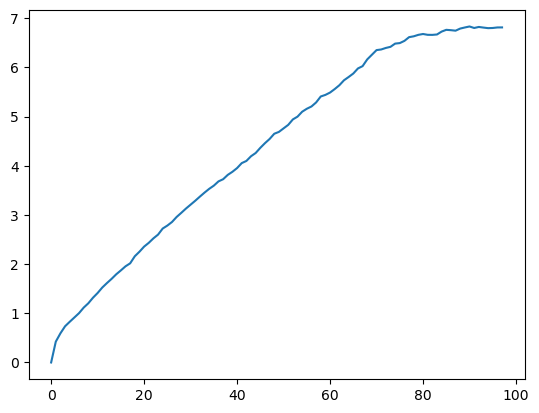

In [10]:
from matplotlib import pyplot as plt
from MDAnalysis.analysis.rms import RMSD
%matplotlib inline

u = mda.Universe(PSF, DCD)

c_alphas = u.select_atoms('name CA')

R = RMSD(c_alphas, c_alphas)
R.run()
plt.plot(R.results.rmsd.T[0], R.results.rmsd.T[2])


# A summary of Lecture 1

Most simulation analysis will involve extracting position data from certain atoms.

- A Universe contains all information about a simulation system

- An `AtomGroup` contains information about a group of atoms

- We can use `Universe.select_atoms()` to create an `AtomGroup` containing specific atoms from a `Universe`

- Positions of atoms in an `AtomGroup` are accessed through `AtomGroup.positions`

## Now - on to the first tutorial!

Find the tutorial notebook `MD_01_System_Manipulation` under: 

https://github.com/MDAnalysis/MDAnalysisWorkshop-Intro1Day/blob/may24-ws/notebooks/Tutorial1_System_Manipulation.ipynb

**Remember:**
- Go at your own pace!
- Ask questions!
- Take breaks!